# Visualisations of the results

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
save = True

1. Data Loading

In [160]:
NeuralNetwork = pd.read_csv('./Results/NeuralNetworkPredictions.csv')
LogisticRegression = pd.read_csv('./Results/Logistic_Regression_Results_Sklearn.csv')
NaiveBayes = pd.read_csv('./Results/NaiveBayesResults.csv')

In [161]:
nn_cm = confusion_matrix(NeuralNetwork['Gold Labels'], NeuralNetwork['NN Predictions'])
sk_nn_cm = confusion_matrix(NeuralNetwork['Gold Labels'], NeuralNetwork['SK Predictions'])
lr_cm = confusion_matrix(LogisticRegression['Ground Truth'], LogisticRegression['LRPredictions'])
sk_lr_cm = confusion_matrix(LogisticRegression['Ground Truth'], LogisticRegression['SKPredictions'])
nb_cm = confusion_matrix(NaiveBayes['Ground Truth'], NaiveBayes['Naive Bayes'])
sk_nb_cm = confusion_matrix(NaiveBayes['Ground Truth'], NaiveBayes['Sk Learn'])

accuracy_NN = accuracy_score(NeuralNetwork['Gold Labels'], NeuralNetwork['NN Predictions'])
accuracy_NN_sk = accuracy_score(NeuralNetwork['Gold Labels'], NeuralNetwork['SK Predictions'])
accuracy_LR = accuracy_score(LogisticRegression['Ground Truth'], LogisticRegression['LRPredictions'])
accuracy_LR_sk = accuracy_score(LogisticRegression['Ground Truth'], LogisticRegression['SKPredictions'])
accuracy_NB = accuracy_score(NaiveBayes['Ground Truth'], NaiveBayes['Naive Bayes'])
accuracy_NB_sk = accuracy_score(NaiveBayes['Ground Truth'], NaiveBayes['Sk Learn'])

precision_NN = precision_score(NeuralNetwork['Gold Labels'], NeuralNetwork['NN Predictions'], average='weighted')
precision_NN_sk = precision_score(NeuralNetwork['Gold Labels'], NeuralNetwork['SK Predictions'], average='weighted' )
precision_LR = precision_score(LogisticRegression['Ground Truth'], LogisticRegression['LRPredictions'], average='weighted')
precision_LR_sk = precision_score(LogisticRegression['Ground Truth'], LogisticRegression['SKPredictions'], average='weighted')
precision_NB = precision_score(NaiveBayes['Ground Truth'], NaiveBayes['Naive Bayes'], average='weighted')
precision_NB_sk = precision_score(NaiveBayes['Ground Truth'], NaiveBayes['Sk Learn'], average='weighted')

recall_NN = recall_score(NeuralNetwork['Gold Labels'], NeuralNetwork['NN Predictions'], average='weighted')
recall_NN_sk = recall_score(NeuralNetwork['Gold Labels'], NeuralNetwork['SK Predictions'], average='weighted')
recall_LR = recall_score(LogisticRegression['Ground Truth'], LogisticRegression['LRPredictions'], average='weighted')
recall_LR_sk = recall_score(LogisticRegression['Ground Truth'], LogisticRegression['SKPredictions'], average='weighted')
recall_NB = recall_score(NaiveBayes['Ground Truth'], NaiveBayes['Naive Bayes'], average='weighted')
recall_NB_sk = recall_score(NaiveBayes['Ground Truth'], NaiveBayes['Sk Learn'], average='weighted')

f1_NN = f1_score(NeuralNetwork['Gold Labels'], NeuralNetwork['NN Predictions'], average='weighted')
f1_NN_sk = f1_score(NeuralNetwork['Gold Labels'], NeuralNetwork['SK Predictions'], average='weighted')
f1_LR = f1_score(LogisticRegression['Ground Truth'], LogisticRegression['LRPredictions'], average='weighted')
f1_LR_sk = f1_score(LogisticRegression['Ground Truth'], LogisticRegression['SKPredictions'], average='weighted')
f1_NB = f1_score(NaiveBayes['Ground Truth'], NaiveBayes['Naive Bayes'], average='weighted')
f1_NB_sk = f1_score(NaiveBayes['Ground Truth'], NaiveBayes['Sk Learn'], average='weighted')

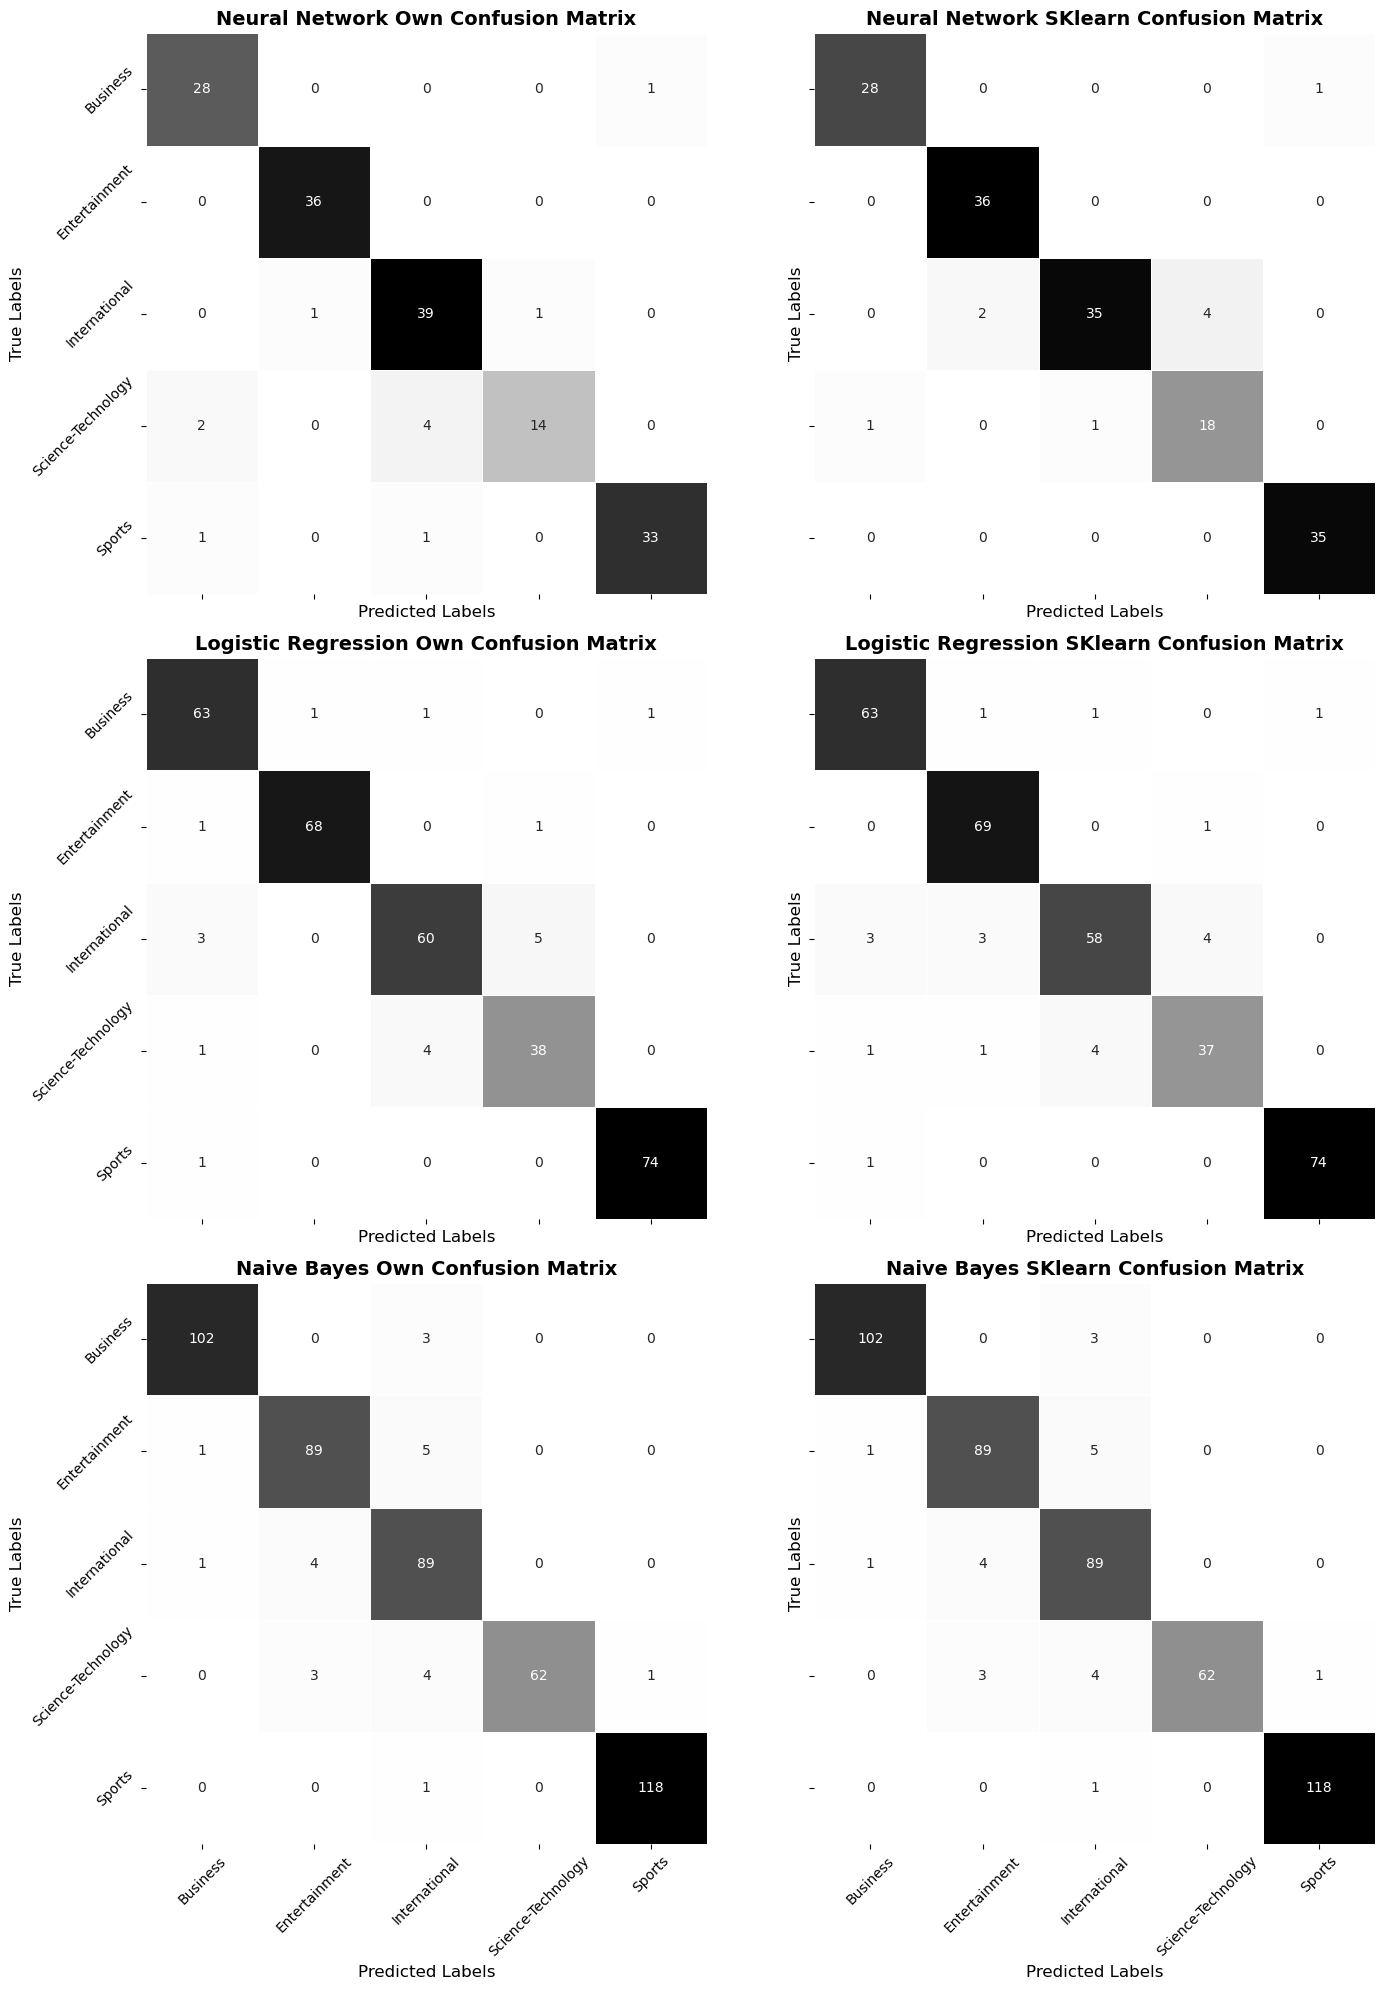

In [162]:

fig, ax = plt.subplots(3, 2, figsize=(15, 20), sharex=True, sharey=True)

heatmaps = [
    (nn_cm, 'Neural Network Own Confusion Matrix'),
    (sk_nn_cm, 'Neural Network SKlearn Confusion Matrix'),
    (lr_cm, 'Logistic Regression Own Confusion Matrix'),
    (sk_lr_cm, 'Logistic Regression SKlearn Confusion Matrix'),
    (nb_cm, 'Naive Bayes Own Confusion Matrix'),
    (sk_nb_cm, 'Naive Bayes SKlearn Confusion Matrix')
]
for i, (cm, title) in enumerate(heatmaps):
    row, col = divmod(i, 2)
    sns.heatmap(
        cm, annot=True, fmt='d', ax=ax[row, col], cmap='Greys', cbar=False, 
        linewidths=0.5, linecolor='white', square=True
    )
    ax[row, col].set_title(title, fontsize=14, weight='bold')
    ax[row, col].set_xlabel('Predicted Labels', fontsize=12)
    ax[row, col].set_ylabel('True Labels', fontsize=12)
    
    if i < 2:
        labels = set(NeuralNetwork['Gold Labels'])
    elif i < 4:
        labels = set(LogisticRegression['Ground Truth'])
    else:
        labels = set(NaiveBayes['Ground Truth'])

    ax[row, col].set_xticklabels(sorted(labels), rotation=45, fontsize=10)
    ax[row, col].set_yticklabels(sorted(labels), rotation=45, fontsize=10)
plt.tight_layout()
if save:
    plt.savefig('./Graphs/confusion_matrices_grayscale.png', dpi=600, bbox_inches='tight')
plt.show()

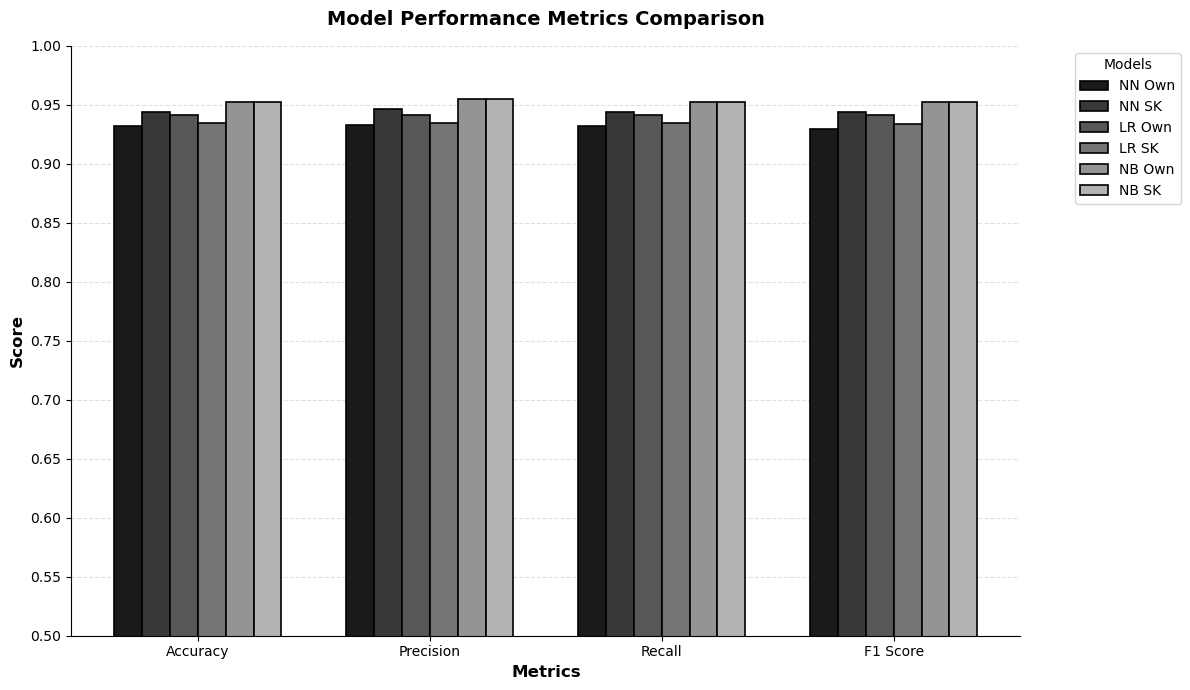

In [163]:

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['NN Own', 'NN SK', 'LR Own', 'LR SK', 'NB Own', 'NB SK']

data = np.array([
    [accuracy_NN, accuracy_NN_sk, accuracy_LR, accuracy_LR_sk, accuracy_NB, accuracy_NB_sk],
    [precision_NN, precision_NN_sk, precision_LR, precision_LR_sk, precision_NB, precision_NB_sk],
    [recall_NN, recall_NN_sk, recall_LR, recall_LR_sk, recall_NB, recall_NB_sk],
    [f1_NN, f1_NN_sk, f1_LR, f1_LR_sk, f1_NB, f1_NB_sk]
])

fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.12
group_positions = np.arange(len(metrics)) 

for i, model in enumerate(models):
    ax.bar(
        group_positions + i * bar_width, data[:, i], bar_width,
        label=model, color=str(0.1 + i * 0.12), edgecolor='black', linewidth=1.2
    )

ax.set_xticks(group_positions + 2.5 * bar_width)
ax.set_xticklabels(metrics, rotation=0, fontsize=10, color='black')
ax.set_title('Model Performance Metrics Comparison', fontsize=14, weight='bold', pad=15, color='black')
ax.set_ylabel('Score', fontsize=12, fontweight='bold', color='black')
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold', color='black')
ax.legend(title="Models", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')


ax.yaxis.grid(True, linestyle='--', color='lightgray', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(colors='black')

ax.set_ylim([0.5, 1])
ax.set_yticks(np.arange(0.5, 1.05, 0.05))

plt.tight_layout()
if save:
    plt.savefig('./Graphs/metrics_by_model_groups_switched.png', dpi=600, bbox_inches='tight')
plt.show()

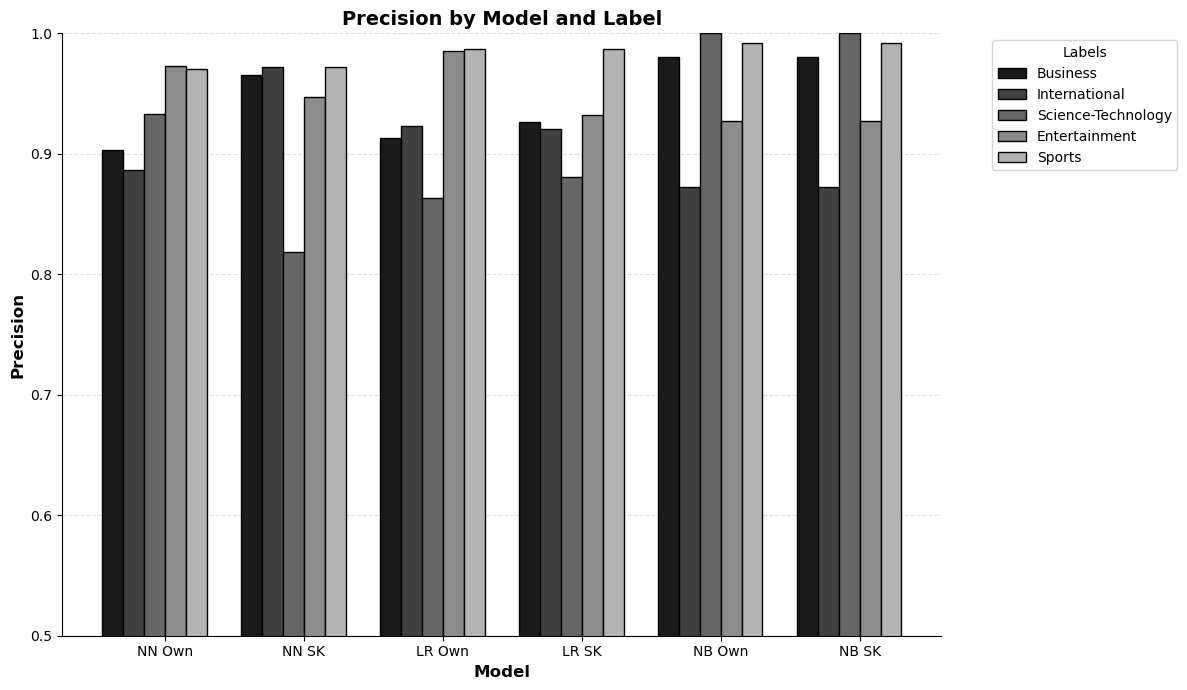

In [164]:

classification_report_NN = classification_report(NeuralNetwork['Gold Labels'], NeuralNetwork['NN Predictions'], output_dict=True)
classification_report_NN_sk = classification_report(NeuralNetwork['Gold Labels'], NeuralNetwork['SK Predictions'], output_dict=True)
classification_report_LR = classification_report(LogisticRegression['Ground Truth'], LogisticRegression['LRPredictions'], output_dict=True)
classification_report_LR_sk = classification_report(LogisticRegression['Ground Truth'], LogisticRegression['SKPredictions'], output_dict=True)
classification_report_NB = classification_report(NaiveBayes['Ground Truth'], NaiveBayes['Naive Bayes'], output_dict=True)
classification_report_NB_sk = classification_report(NaiveBayes['Ground Truth'], NaiveBayes['Sk Learn'], output_dict=True)

labels = ['Business', 'International', 'Science-Technology', 'Entertainment', 'Sports']
models = ['NN Own', 'NN SK', 'LR Own', 'LR SK', 'NB Own', 'NB SK']

precision_data = np.array([
    [classification_report_NN[label]['precision'] for label in labels],
    [classification_report_NN_sk[label]['precision'] for label in labels],
    [classification_report_LR[label]['precision'] for label in labels],
    [classification_report_LR_sk[label]['precision'] for label in labels],
    [classification_report_NB[label]['precision'] for label in labels],
    [classification_report_NB_sk[label]['precision'] for label in labels]
])



precision_data = precision_data.T

fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.15
group_positions = np.arange(len(models)) 

for i, label in enumerate(labels):
    ax.bar(
        group_positions + i * bar_width, precision_data[i], bar_width,
        label=label, color=str(0.1 + 0.15 * i), edgecolor='black', linewidth=1
    )

ax.set_xticks(group_positions + 2.5 * bar_width)
ax.set_xticklabels(models, rotation=0, fontsize=10)
ax.set_title('Precision by Model and Label', fontsize=14, weight='bold')
ax.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.legend(title="Labels", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

ax.yaxis.grid(True, linestyle='--', color='lightgray', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim([0.5, 1])

plt.tight_layout()
if save:
    plt.savefig('./Graphs/precision_by_model_and_label_grayscale.png', dpi=600, bbox_inches='tight')
plt.show()

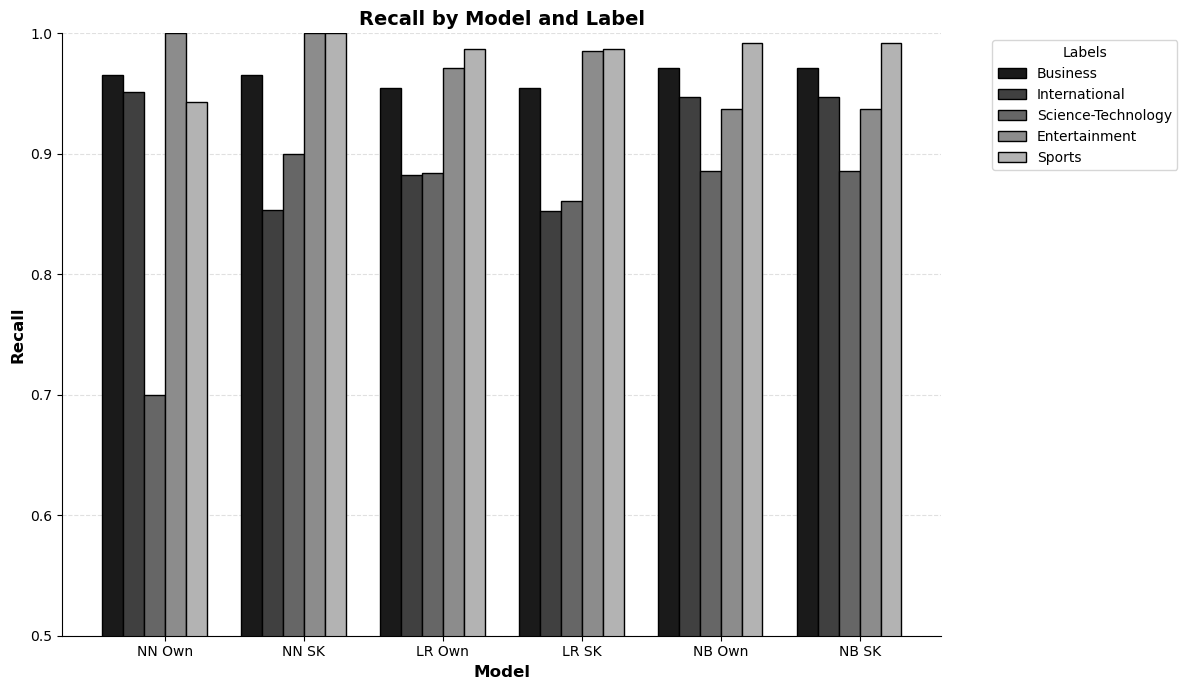

In [165]:
labels = ['Business', 'International', 'Science-Technology', 'Entertainment', 'Sports']
models = ['NN Own', 'NN SK', 'LR Own', 'LR SK', 'NB Own', 'NB SK']

recall_data = np.array([
    [classification_report_NN[label]['recall'] for label in labels],
    [classification_report_NN_sk[label]['recall'] for label in labels],
    [classification_report_LR[label]['recall'] for label in labels],
    [classification_report_LR_sk[label]['recall'] for label in labels],
    [classification_report_NB[label]['recall'] for label in labels],
    [classification_report_NB_sk[label]['recall'] for label in labels]
])

recall_data = recall_data.T

fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.15
group_positions = np.arange(len(models)) 

for i, label in enumerate(labels):
    ax.bar(
        group_positions + i * bar_width, recall_data[i], bar_width,
        label=label, color=str(0.1 + 0.15 * i), edgecolor='black', linewidth=1
    )

ax.set_xticks(group_positions + 2.5 * bar_width)
ax.set_xticklabels(models, rotation=0, fontsize=10)
ax.set_title('Recall by Model and Label', fontsize=14, weight='bold')
ax.set_ylabel('Recall', fontsize=12, fontweight='bold')
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.legend(title="Labels", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

ax.yaxis.grid(True, linestyle='--', color='lightgray', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim([0.5, 1])

plt.tight_layout()
if save:
    plt.savefig('./Graphs/recall_by_model_and_labels_grayscale.png', dpi=600, bbox_inches='tight')
plt.show()

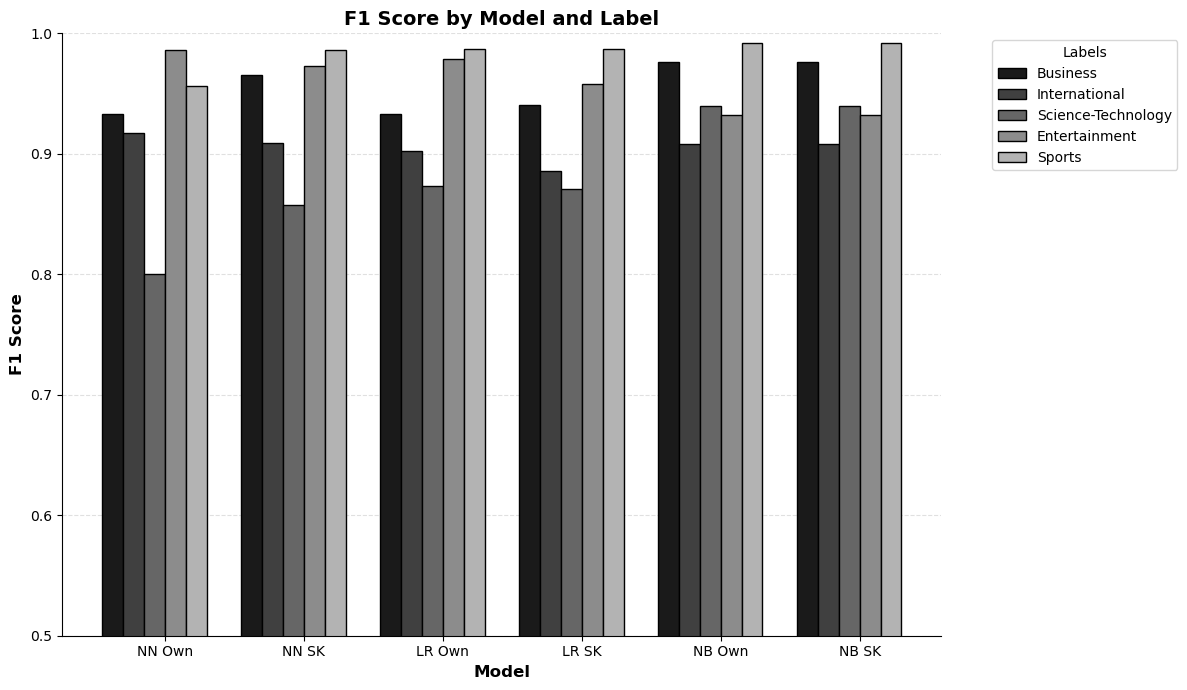

In [166]:

labels = ['Business', 'International', 'Science-Technology', 'Entertainment', 'Sports']
models = ['NN Own', 'NN SK', 'LR Own', 'LR SK', 'NB Own', 'NB SK']

f1_data = np.array([
    [classification_report_NN[label]['f1-score'] for label in labels],
    [classification_report_NN_sk[label]['f1-score'] for label in labels],
    [classification_report_LR[label]['f1-score'] for label in labels],
    [classification_report_LR_sk[label]['f1-score'] for label in labels],
    [classification_report_NB[label]['f1-score'] for label in labels],
    [classification_report_NB_sk[label]['f1-score'] for label in labels]
])

f1_data = f1_data.T

fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.15
group_positions = np.arange(len(models)) 

for i, label in enumerate(labels):
    ax.bar(
        group_positions + i * bar_width, f1_data[i], bar_width,
        label=label, color=str(0.1 + 0.15 * i), edgecolor='black', linewidth=1
    )
    
ax.set_xticks(group_positions + 2.5 * bar_width)
ax.set_xticklabels(models, rotation=0, fontsize=10)
ax.set_title('F1 Score by Model and Label', fontsize=14, weight='bold')
ax.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.legend(title="Labels", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

ax.yaxis.grid(True, linestyle='--', color='lightgray', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim([0.5, 1])

plt.tight_layout()
if save:
    plt.savefig('./Graphs/f1_score_by_model_and_label_grayscale.png', dpi=600, bbox_inches='tight')
plt.show()

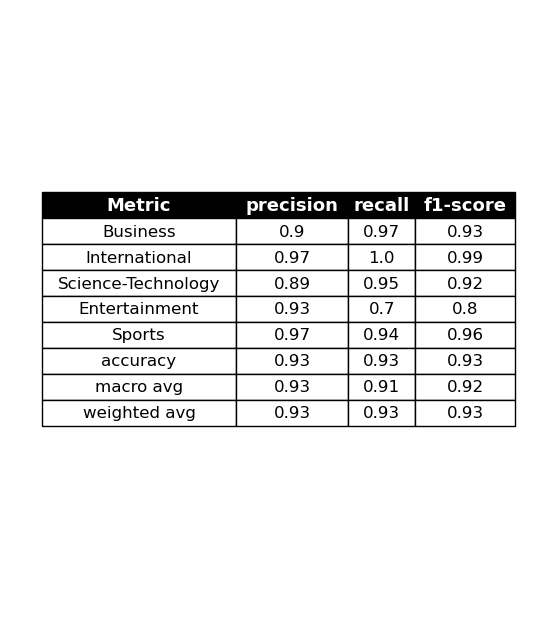

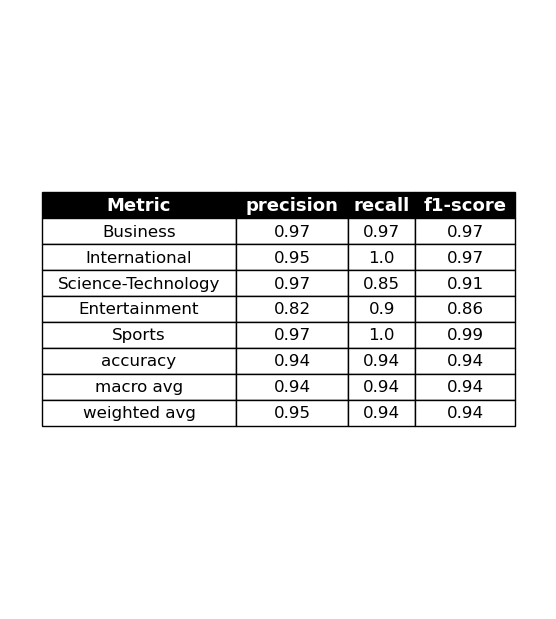

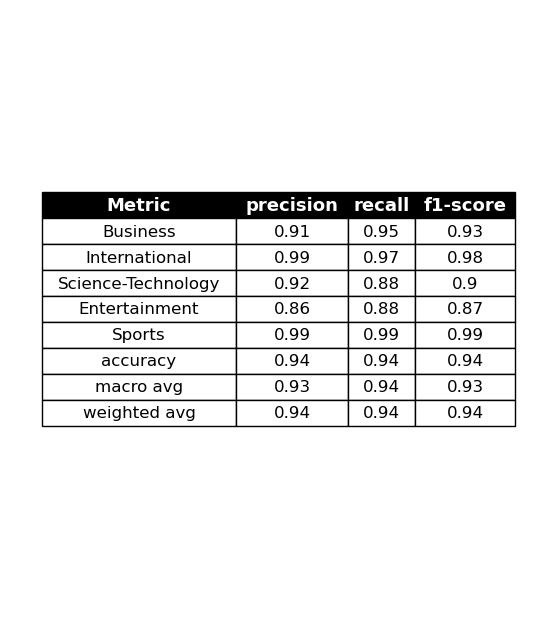

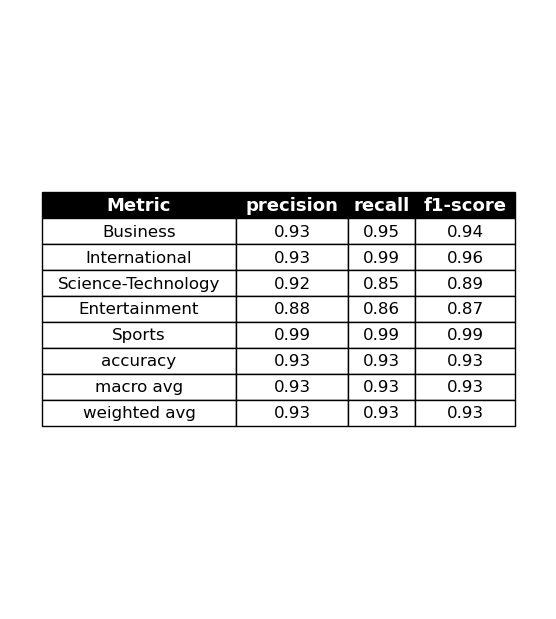

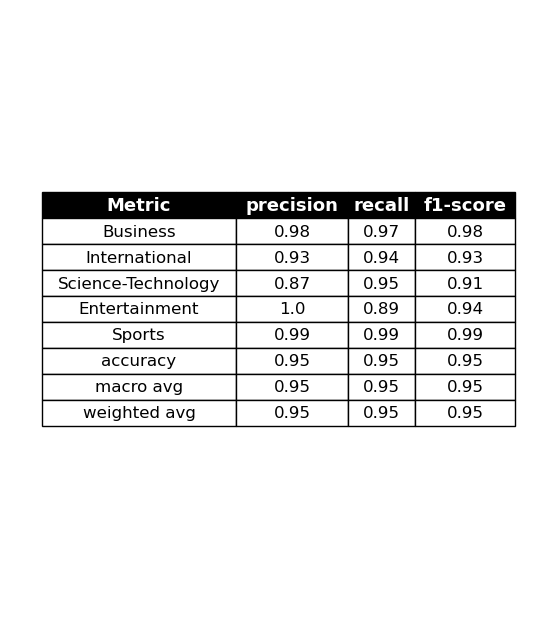

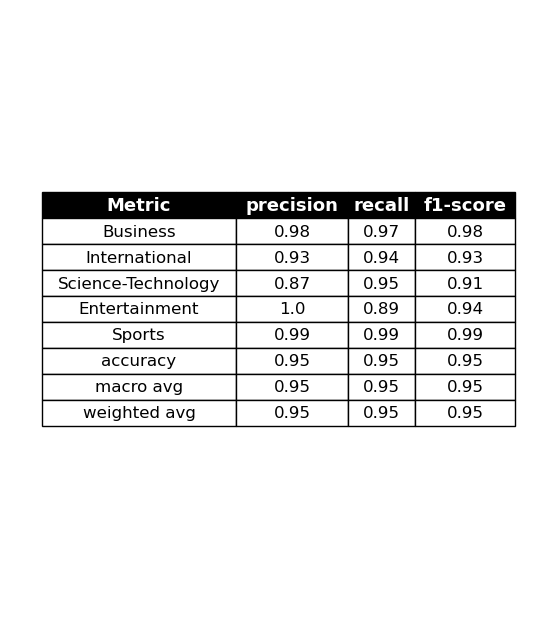

In [167]:
labels = ['Business', 'International', 'Science-Technology', 'Entertainment', 'Sports']

classification_report_NN = classification_report(NeuralNetwork['Gold Labels'], NeuralNetwork['NN Predictions'], target_names=labels, output_dict=True)
classification_report_NN_sk = classification_report(NeuralNetwork['Gold Labels'], NeuralNetwork['SK Predictions'], target_names=labels, output_dict=True)
classification_report_LR = classification_report(LogisticRegression['Ground Truth'], LogisticRegression['LRPredictions'], target_names=labels, output_dict=True)
classification_report_LR_sk = classification_report(LogisticRegression['Ground Truth'], LogisticRegression['SKPredictions'], target_names=labels, output_dict=True)
classification_report_NB = classification_report(NaiveBayes['Ground Truth'], NaiveBayes['Naive Bayes'], target_names=labels, output_dict=True)
classification_report_NB_sk = classification_report(NaiveBayes['Ground Truth'], NaiveBayes['Sk Learn'], target_names=labels, output_dict=True)

def create_df(classification_report, model_name):
    df = pd.DataFrame(classification_report).T.drop(columns=['support'])
    df['Model'] = model_name
    df = df.drop(columns=['Model'], axis=1)
    df = df.round(2)
    df = df.reset_index().rename(columns={'index': 'Metric'})
    return df

df_NN = create_df(classification_report_NN, 'NN Own')
df_NN_sk = create_df(classification_report_NN_sk, 'NN SK')
df_LR = create_df(classification_report_LR, 'LR Own')
df_LR_sk = create_df(classification_report_LR_sk, 'LR SK')
df_NB = create_df(classification_report_NB, 'NB Own')
df_NB_sk = create_df(classification_report_NB_sk, 'NB SK')

def plot_table(df, title):
    fig, ax = plt.subplots(figsize=(10, 6)) 
    ax.axis('off') 
    
    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center',
        loc='center',
        colColours=['#FFFFFF'] * len(df.columns),
        colWidths=[0.15] * len(df.columns)  
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.auto_set_column_width(col=list(range(len(df.columns)))) 
    table.scale(1.2, 1.2)  

    for (i, j), cell in table.get_celld().items():
        if i == 0:  
            cell.set_fontsize(13)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#000000')
            cell.set_text_props(color='white') 
        else: 
            cell.set_facecolor('#FFFFFF')  
    
    plt.subplots_adjust(left=0.01, right=0.02, top=0.02, bottom=0.01)
    plt.tight_layout(pad=0) 
    if save:
        plt.savefig(f'./Graphs/{title}.png', dpi=600, bbox_inches='tight')
    plt.show()

plot_table(df_NN, 'NN Own Classification Report')
plot_table(df_NN_sk, 'NN SK Classification Report')
plot_table(df_LR, 'LR Own Classification Report')
plot_table(df_LR_sk, 'LR SK Classification Report')
plot_table(df_NB, 'NB Own Classification Report')
plot_table(df_NB_sk, 'NB SK Classification Report')